# RIWRS-Oferta1
### Codigo fonte referente a disciplina Recuperação da Informação na Web e Redes Sociais
### do Curso Ciência de Dados e Big Data ministrado na PUC Minas Uberândia.

#### Consiste em realizar a busca de Twitter e realizar algunas analises dos dados

In [1]:
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener
import time

In [5]:
# setup security 
# access_token = 'access_token'
# access_token_secret = 'access_token_secret'
# consumer_key = 'consumer_key'
# consumer_secret = 'consumer_secret'

# setup security 
access_token = '60646343-XBn1JOUur0ed5bJsGazcSSJYGt4rUAFnhy0oo2Bg1'
access_token_secret = 'aXRBT6maXMxRDnNYi9AglUMGbgza4AecjF9GzdKiiEoDc'
consumer_key = 'Z4nInT3ZJ4dUlDMqErDeRKMpM'
consumer_secret = '9oPRFoEnpZF2CYW0KRqzpavSu19wGgY4rAObJ04iscAnD8HD0p'

# setup file store

file = 'C:/Users/marcellosd.ACS/OneDrive/PosGraduação/Recuperação da Informação na Web e Redes Sociais/tweets-sample1.json'

In [6]:
class MyListener(StreamListener):        
    
    def __init__(self, file):
        global the_file
        self.the_file = open(file, 'w', encoding='utf-8')
        
    def on_data(self, data):
        self.the_file.write(data)
        return True
    
    def on_error(self, status):
        print(status)
        
    def file_close(self):
        self.the_file.close()        

In [7]:
listener = MyListener(file)
oauth = OAuthHandler(consumer_key, consumer_secret)
oauth.set_access_token(access_token, access_token_secret)

max_time = 30 # in seconds
start_time = time.time() 

## collecting...
stream = Stream(oauth, listener)
#stream.filter(track=['franca', 'frança','neymar', 'ronaldo', 'messi', 'sallah', 'hazard', 'Gabriel Jesus', 'Marcelo', 'pogba', 'cr7'],async=True)
stream.filter(track=['BigData','Big Data'],async=True)
elapsed_time = (time.time() - start_time)
while  elapsed_time < max_time:
    elapsed_time = (time.time() - start_time)

    
print('**Finish**')
stream.disconnect()
listener.file_close()

Exception in thread Thread-7:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\contrib\pyopenssl.py", line 441, in wrap_socket
    cnx.do_handshake()
  File "C:\ProgramData\Anaconda3\lib\site-packages\OpenSSL\SSL.py", line 1907, in do_handshake
    self._raise_ssl_error(self._ssl, result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\OpenSSL\SSL.py", line 1639, in _raise_ssl_error
    _raise_current_error()
  File "C:\ProgramData\Anaconda3\lib\site-packages\OpenSSL\_util.py", line 54, in exception_from_error_queue
    raise exception_type(errors)
OpenSSL.SSL.Error: [('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')]

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py", line 601, in urlopen
    chunked=chunked)
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool

**Finish**


In [91]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
tweets_data = []
tweets_file = open(file, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        

In [118]:
tweets_data

[{'created_at': 'Sat Jul 14 12:52:05 +0000 2018',
  'id': 1018115920672280577,
  'id_str': '1018115920672280577',
  'text': "RT @paulpogba: C'est pas fini @equipedefrance #FiersdetreBleus https://t.co/jWg42DZaFk",
  'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
  'truncated': False,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 593616626,
   'id_str': '593616626',
   'name': 'UMTITI 🇫🇷❤',
   'screen_name': 'lindou_bindou',
   'location': 'Strasbourg, France',
   'url': 'https://www.instagram.com/ms_make_up67/',
   'description': 'Jesus Is Life ❤\n«et tout ce que vous demanderez en mon nom, je le ferai, afin que le Père soit glorifié dans le Fils.» Jean 14:13\n🇫🇷🇮🇳 #M',
   'translator_type': 'regular',
   'protected': False,
   'verified': False,
   'followers_count': 1198,
   'friends_count': 88

In [119]:
for tweet in tweets_data:
    print(tweet['user']['location'])

Strasbourg, France
None
Barranquilla ~ Colombia
Onde vc quiser
None
Ubajara, Brasil
Barcelona, Catalunya
Karnataka, India
Charente-Maritime, Poitou-Char
Split
2520
Ilhéus, Brasil
Venezuela
None
• El Salvador •
Jogjakarta,  Indonesia
 🇬🇧🇲🇨  rp/fl (in)
Clydebank, Scotland
Deuw wouro 
Lamballe
Ile-de-France, France
None
None
None
Luzenac
None
Corrientes, Argentina
🇭🇷
Côte d'Ivoire
None
Rouen, France
Murcia
None
Blue Planet
None
None
Karakistan
Mar del Plata
Coatzacoalcos
Mumbai 
Montevideo, Uruguay
Rosario SF
Galiza Ceibe! Poder Popular!


In [120]:
tweets = pd.DataFrame()

tweets['lang'] = ''
tweets['text'] = ''
tweets['country'] = ''
for tweet in tweets_data:
    if 'lang' in tweet:
        tweets.loc[len(tweets)] = [tweet['lang'],
                                   tweet['text'],
                                   tweet['user']['location'] if tweet['user']['location'] != None else 'Sem Pais']
    
tweets

,lang,text,country
0,fr,RT @paulpogba: C'est pas fini @equipedefrance ...,"Strasbourg, France"
1,fr,RT @paulpogba: C'est pas fini @equipedefrance ...,Sem Pais
2,es,RT @LaLibertadCo: Francia y Croacia… ¿Quién ga...,Barranquilla ~ Colombia
3,pt,RT @goleada_info: Bom dia! A partir de 11h nós...,Onde vc quiser
4,es,RT @VodafoneTV_es: ¡La mayor cita futbolística...,Sem Pais
5,pt,Vou torcer para a França @equipedefrance https...,"Ubajara, Brasil"
6,en,RT @YuriYurisky: Unpublished photos of the ent...,"Barcelona, Catalunya"
7,fr,@FrenchTeam ALLEZ ALLEZ LES BLEUS\nCOME ON POG...,"Karnataka, India"
8,und,@kimpembe_3 @equipedefrance https://t.co/gJo49...,"Charente-Maritime, Poitou-Char"
9,und,HRVATSKA-ENGLESKA (Englishman in New York) | B...,Split


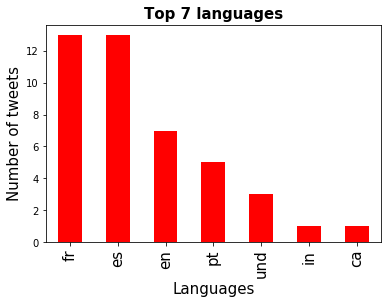

In [121]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 7 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:7].plot(ax=ax, kind='bar', color='red')

In [122]:
tweets_by_lang = tweets['lang'].value_counts()
tweets_by_lang

fr     13
es     13
en      7
pt      5
und     3
in      1
ca      1
Name: lang, dtype: int64

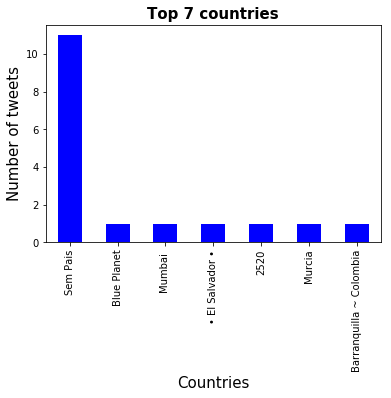

In [123]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 7 countries', fontsize=15, fontweight='bold')
tweets_by_country[:7].plot(ax=ax, kind='bar', color='blue')

In [124]:
import re
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [125]:
## filtrando aqueles q mais foram falados (termos mais influentes)
# 'Copa2018','Franca','Croacia','FrenchTeam','equipedefrance','Hrvatska','Croatian','HNS_CFF'
players = []
for tweet in tweets_data:
    if 'text' in tweet:
        if word_in_text('Copa2018', tweet['text']):
            players.append('Copa 2018')
        elif word_in_text('Franca', tweet['text']):
            players.append('França')
        elif word_in_text('Croacia', tweet['text']):
            players.append('Croacia')
        elif word_in_text('FrenchTeam', tweet['text']):
            players.append('FrenchTeam')
        elif word_in_text('equipedefrance', tweet['text']):
            players.append('equipedefrance')
        elif word_in_text('Hrvatska', tweet['text']):
            players.append('Hrvatska')
        elif word_in_text('Croatian', tweet['text']):
            players.append('Croatian')
        elif word_in_text('HNS_CFF', tweet['text']):
            players.append('HNS_CFF')        
        else:
            players.append('None')
tweets['player'] = players
tweets

,lang,text,country,player
0,fr,RT @paulpogba: C'est pas fini @equipedefrance ...,"Strasbourg, France",equipedefrance
1,fr,RT @paulpogba: C'est pas fini @equipedefrance ...,Sem Pais,equipedefrance
2,es,RT @LaLibertadCo: Francia y Croacia… ¿Quién ga...,Barranquilla ~ Colombia,Croacia
3,pt,RT @goleada_info: Bom dia! A partir de 11h nós...,Onde vc quiser,None
4,es,RT @VodafoneTV_es: ¡La mayor cita futbolística...,Sem Pais,Croacia
5,pt,Vou torcer para a França @equipedefrance https...,"Ubajara, Brasil",equipedefrance
6,en,RT @YuriYurisky: Unpublished photos of the ent...,"Barcelona, Catalunya",None
7,fr,@FrenchTeam ALLEZ ALLEZ LES BLEUS\nCOME ON POG...,"Karnataka, India",FrenchTeam
8,und,@kimpembe_3 @equipedefrance https://t.co/gJo49...,"Charente-Maritime, Poitou-Char",equipedefrance
9,und,HRVATSKA-ENGLESKA (Englishman in New York) | B...,Split,Hrvatska


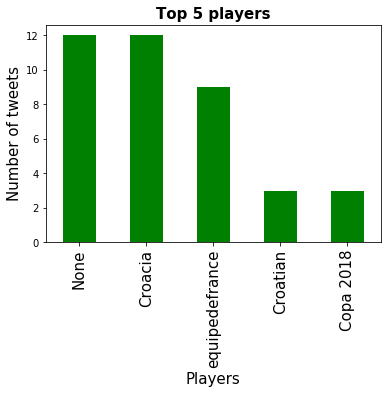

In [126]:
tweets_by_player = tweets['player'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Players', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 players', fontsize=15, fontweight='bold')
tweets_by_player[:5].plot(ax=ax, kind='bar', color='green')

In [ ]:
## Desafio: filtrando pelas coordenadas geográficas os tweets em português
